# PyTorch Tutorial

This tutorial is mostly based on:

* https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [1]:
import numpy as np
import torch

print(torch.__version__)

2.6.0+cu124


## What is PyTorch?
PyTorch is a framework for working with deep neural networks.

## Why use PyTorch?
- Autograd functionality computes gradients automatically
- PyTorch integrates well with the Python data science stack, including NumPy, SciPy and Pandas for efficient data loading and processing pipelines
- GPU acceleration allows for fast training and inference, utilizing the parallel processing power of GPUs
- A large library of useful deep learning functions and modules are already built-in, enabling faster development and deployment of models


## Overview
- `torch.Tensor` basic tensor operation
- `torch.Tensor.grad` auto-differentiation
- `torch.cuda` devices other than CPU
- `torch.nn` neural network blocks
- `torch.utils.data` dataset and dataloader

## PyTorch Tensors

PyTorch tensors are just like NumPy arrays, and they include many of the same operations you are used to from NumPy.

Construct a tensor of size $5 \times 3$ with random values:



In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3743, 0.2606, 0.3921],
        [0.3763, 0.7383, 0.4317],
        [0.3076, 0.1430, 0.0710],
        [0.1086, 0.7765, 0.0204],
        [0.5524, 0.7195, 0.0082]])


Construct a matrix filled with zeros and of dtype int:



In [3]:
# Create a 5x3 tensor filled with zeros using int32 datatype
# torch.int32 provides a balance between memory usage and range
x = torch.zeros(5, 3, dtype=torch.int32)  # torch.int = torch.int32 = 32-bit signed integer, range of (-2^31) to (2^31 - 1)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)


Construct a matrix filled with zeros and of dtype long:


In [4]:
# Create a 5x3 tensor filled with zeros using int64 (long) datatype
# Use when working with large integers or when indexing large tensors
x = torch.zeros(5, 3, dtype=torch.long)  # torch.long = torch.int64 = 64-bit signed integer, range of (-2^63) to (2^63 - 1)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Make a tensor from a list of values:

In [5]:
# PyTorch automatically infers appropriate datatypes based on input values
# Integer without decimal points create tensors with torch.int64 (long) datatype
x = torch.tensor([1, 2, 3])
print(x)
print(x.dtype)

# Floating point literals with decimal points create tensors with torch.float32 datatype
# float32 is the default floating-point precision in PyTorch
x = torch.tensor([1., 2., 3.])
print(x)
print(x.dtype)

tensor([1, 2, 3])
torch.int64
tensor([1., 2., 3.])
torch.float32


Create a tensor based on another tensor (inherit size and dtype, unless otherwise specified):

By default, the returned Tensor of `new_ones` has the same torch.dtype and torch.device as input tensor.

In [6]:
# Create a new tensor with the same dtype and device as x, but filled with ones
# new_* methods (like new_ones) inherit properties (dtype and device) from the source tensor
# new_* methods take output matrix size as input parameters
x = x.new_ones(5, 3)
print(x)

# Create a tensor with same shape as x but filled with random values from normal distribution
# Note: randn samples from standard normal distribution (mean=0, std=1)
x = torch.randn_like(x, dtype=torch.float)  # override dtype!
print(x)                                    # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-1.6698e+00, -4.0995e-02,  6.1336e-01],
        [-7.5922e-01, -7.8970e-01, -1.4647e-01],
        [ 1.6595e-01,  2.4633e-01, -4.6894e-01],
        [ 9.4158e-01, -1.0496e+00, -4.7921e-01],
        [-1.0183e+00,  1.3282e-03, -1.6889e-01]])


Get the size object of a tensor, an object which supports tuple operations:

In [7]:
# size() is a method that returns a torch.size object
# It shows the dimensions of the tensor in each axis
print(x.size())

# shape is an attribute that provides the same information as size()
# This is equivalent to size() but follows NumPy's style convention
x.shape

torch.Size([5, 3])


torch.Size([5, 3])

Operations on tensors use similar syntax to NumPy:

In [8]:
# Create two 5x3 tensors filled with ones
x = torch.ones(5, 3)
y = torch.ones(5, 3)

# Element-wise addition using operator syntax (creates a new tensor)
print("x + y:", x + y)

# Element-wise addition using function syntax (equivalent to operator syntax)
print("torch.add(x, y):", torch.add(x, y))

# Original tensors remain unchanged
print("x:", x)
print("y:", y)

x + y: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
torch.add(x, y): tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
y: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


PyTorch also supports in-place operations (method names end in '_'):

In [9]:
# In-place operations modify the tensor directly and are denoted by a trailing underscore (_)
# add_ adds x to y and stores the result in y (equivalent to y = y + x)
y.add_(x)
print(y)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


#### Qn: What happens if you run y.add_(x) again?

In [10]:
# What happens if you run y.add_(x) again?
# y.add_(x) will add x to y again, but this time it will use the updated y value
# This is because in-place operations modify the tensor in place
# So if you run y.add_(x) again, it will use the new value of y after the first addition
y.add_(x)
print(y) # 메모리 참조를 통해 Add를 수행했으므로 3으로 채워진다


tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


#### Qn: What function does "Run before" command serve in Google colab?

In [11]:
# NOTE: For jupyter notebooks, do not run cells that update values of certain variables,
# tensors or have inplace operations multiple times!
# This is because the variable values will be updated and the next cells that use those variables will give incorrect results.

# Solution for Google colab:
# Step 1: Edit >> Clear all outputs without restarting the kernel (수정 -> 모든 출력 제거)
# Step 2: Runtime >> Interrupt execution (this will interrupt the execution of the current cell) (런타임 -> 실행 중단)
# Step 3: Runtime >> Restart session (this will restart the kernel and clear all variables) (런타임 -> 세션 다시 시작)
# Step 4: Runtime >> Run before (this will run all the cells before the current cell) (런타임 -> 이전 셀 실행)

# These steps ensure that the variable values are not changed unexpectedly!

Example of broadcasting:

To learn more:
- Broadcasting basics using Numpy: https://numpy.org/doc/stable/user/basics.broadcasting.html
- Visual Example of Broadcasting using Numpy:  https://numpy.org/doc/stable/_images/broadcasting_2.png
- <a href="https://numpy.org/doc/stable/user/basics.broadcasting.html">
  <img src="https://numpy.org/doc/stable/_images/broadcasting_2.png"
       alt="Broadcasting example" width="500"/>
</a>
- Broadcasting basics using PyTorch: https://pytorch.org/docs/stable/notes/broadcasting.html

In [12]:
import numpy as np
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0]) # 차원을 a 기준으로 맞춰서 값 broadcasting

print(f"Shape of a: {a.shape}")
print(f"Shape of b: {b.shape}")
a + b


Shape of a: (4, 3)
Shape of b: (3,)


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

#### Qn: What happens if a has shape (4,3) and b has shape (4,)?

In [13]:
# b = np.array([1.0, 2.0, 3.0, 4.0])
# a + b

In [14]:
import numpy as np

# NumPy broadcasting: scalar to array
# The scalar value 3 is broadcast to match the (shape of x) = (5,3)
x = np.ones((5,3)) # 1로 채워진 5행 3열 np.array
y = 3 # x를 기준으로 y가 3으로 채워진 5행 3열 np.array로 broadcast됨
print("x + y:", x + y)


x + y: [[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]


In [15]:
# PyTorch broadcasting: scalar to tensor
# Similar to NumPy, PyTorch broadcasts the scalar value 2 to match x's shape
x = torch.ones(5, 3)
y = 2
print("x + y:", x + y)


x + y: tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


In [16]:
# PyTorch broadcasting: tensor to tensor with different shapes
x = torch.ones(5, 3)
y = torch.ones(5, 1)

print(f"x is {x}, \n\nShape of x is {x.shape}\n")
print(f"y is {y}, \n\nShape of y is {y.shape}")


x is tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), 

Shape of x is torch.Size([5, 3])

y is tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 

Shape of y is torch.Size([5, 1])


#### Qn: Which dimension will y be broadcast along?


In [17]:
# Here, y has shape (5,1) and is broadcast across the second dimension to match x's shape (5,3)
# The value from each row in y is added to each element in the corresponding row of x
print("x + y:", x + y) # y는 5행 3열로 broadcast 된다


x + y: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [18]:
# # failed case of conflicting dimension
# x = torch.ones(5, 3)
# y = torch.ones(3, 5)
# print("x + y:", x + y)

# 행과 열 둘중에 하나는 맞아야지 broadcast 된다

Indexing works as you would expect:

In [19]:
x = torch.randn(5, 3)
print(x)
print(x[1:4, :])

tensor([[ 0.7388,  0.1480, -1.2032],
        [ 0.2768, -0.1873,  0.5093],
        [ 0.5512, -0.5932, -0.2209],
        [ 0.4813, -0.7254, -0.8749],
        [-0.1614,  0.3880,  2.4986]])
tensor([[ 0.2768, -0.1873,  0.5093],
        [ 0.5512, -0.5932, -0.2209],
        [ 0.4813, -0.7254, -0.8749]])


In [20]:
# indexing by operators
x[x < 0] = 0
print(x)

tensor([[0.7388, 0.1480, 0.0000],
        [0.2768, 0.0000, 0.5093],
        [0.5512, 0.0000, 0.0000],
        [0.4813, 0.0000, 0.0000],
        [0.0000, 0.3880, 2.4986]])


You can change the order of the dimensions of a tensor with `torch.permute()`:

In [21]:
# Create a 3D tensor with random values from a normal distribution
# Shape (5, 3, 2) means:
#   - 5 elements in the first dimension (think of as "layers") == Index 0
#   - 3 elements in the second dimension (think of as "rows") == Index 1
#   - 2 elements in the third dimension (think of as "columns") == Index 2
x = torch.randn(5, 3, 2) # 3행 2열의 5차원 torch 생성
print(f"x is {x}, \n\nShape of x is {x.shape}")


x is tensor([[[-0.2909,  0.7799],
         [ 1.8114,  0.9891],
         [ 0.4329, -0.2814]],

        [[-1.0368, -1.0650],
         [-0.0837,  1.2157],
         [ 0.4814, -0.9598]],

        [[-0.0087, -0.6812],
         [-1.2761,  1.1642],
         [-0.9655,  0.9323]],

        [[ 0.8809, -0.9325],
         [-0.0666,  1.1696],
         [-0.6376, -0.3542]],

        [[-0.3159,  0.3105],
         [ 0.9525,  0.3854],
         [-0.5360,  0.7682]]]), 

Shape of x is torch.Size([5, 3, 2])


#### Qn: What would permute(1,2,0) avhieve? Is the data still the same?

In [22]:
# Ans: no values are changed, only how they're organized in memory and how you access them!
# permute rearranges the dimensions of a tensor : permute는 tensor의 실제 데이터 값을 바꾸는게 아니라 읽는 순서만 바꾸는 메서드
# permute(1,2,0) changes the order of dimensions from (0,1,2) to (1,2,0)
# 위의 결과를 보면 5개 차원의 3행 2열 행렬로 읽었는데,
# 아래 결과를 보면 3개 차원의 2행 5열 행렬로 읽는다.
# This is like transposing a matrix, but generalized to higher dimensions

print(f"x.permute(1,2,0) is:\n{x.permute(1,2,0)}\n")
print(f"Shape of x.permute(1,2,0) is: {x.permute(1,2,0).shape}")

x.permute(1,2,0) is:
tensor([[[-0.2909, -1.0368, -0.0087,  0.8809, -0.3159],
         [ 0.7799, -1.0650, -0.6812, -0.9325,  0.3105]],

        [[ 1.8114, -0.0837, -1.2761, -0.0666,  0.9525],
         [ 0.9891,  1.2157,  1.1642,  1.1696,  0.3854]],

        [[ 0.4329,  0.4814, -0.9655, -0.6376, -0.5360],
         [-0.2814, -0.9598,  0.9323, -0.3542,  0.7682]]])

Shape of x.permute(1,2,0) is: torch.Size([3, 2, 5])


Tensor data types and casting:

In [23]:
# torch.double is equivalent to torch.float64 (64-bit floating point)
a = torch.ones(3, 3, dtype=torch.double)
print(a)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [24]:
# Converting tensor to long (int64) data type
# .long() is a convenience method equivalent to a.to(torch.int64)
b = a.long()
print(f"b is {b}, \n\nType of b is {b.type()}")

# Converting tensor to int (int32) data type
# .int() is a convenience method equivalent to a.to(torch.int32)
c = a.int()
print(f"c is {c}, \n\nType of c is {c.type()}")

# check value of a again! 타입 캐스팅 시 깊은 복사가 일어나서 새로운 메모리 공간이 할당된다. 즉 a가 가리키는 메모리랑 b, c가 가리키는 메모리가 다름 (새로운 텐서 반환)
print(f"a is {a}, \n\nType of a is {a.type()}")


b is tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]), 

Type of b is torch.LongTensor
c is tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32), 

Type of c is torch.IntTensor
a is tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64), 

Type of a is torch.DoubleTensor


Documentation on various dtypes: https://pytorch.org/docs/stable/tensors.html

### More useful PyTorch Tensor operations

To see the complete API check here: https://pytorch.org/docs/stable/tensors.html

`.view()` can be used to resize/reshape tensors:


In [25]:
x = torch.randn(4, 4)
y = x.view(16) # 16개의 열로 변환
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions (-1 넣으면 알아서 계산해서 정해준다는 이야기)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use `.item()` to get the value as a Python number:


In [26]:
x = torch.ones(4,5)
x = x.sum()
print(x)
print(x.item()) # item()을 사용하면 Python 자료구조 형태로 바꿔준다.

tensor(20.)
20.0


Concatenating two matrices together

In [27]:
x = torch.ones(5, 3)
y = torch.zeros(5, 2)
print(torch.cat([x, y], dim=1))


tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.]])


#### Qn: What happens if you try to concatenate along dim=0?

In [28]:
# # Ans: RuntimeError: Sizes of tensors must match except in dimension 0:
try:
    print(torch.cat([x, y], dim=0))
except Exception :
    print("RuntimeError: 행을 제외한 나머지 차원이 다르면 안돼요")
# x는 5행 3열, y는 5행 2열
# dim=0이라는건, 첫번째 축 방향(행)으로 이어붙이기 떄문에, 차원 0을 제외한 나머지 차원이 일치해야 한다.
# 이 경우, x와 y의 두번째 출 방향(열)이 다르므로 오류가 발생한다.
print(torch.cat([x, y], dim=1)) # 그럼 이 경우는 가능하다

RuntimeError: 행을 제외한 나머지 차원이 다르면 안돼요
tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.]])


### Converting between NumPy arrays and PyTorch Tensors

Important: PyTorch Tensors and NumPy arrays will share the same underlying memory locations. If you change values for one, the values for the other will be changed too.

Convert PyTorch Tensor to NumPy array:

such conversion requires source tensor to be on CPU.

In [29]:
a = torch.ones(5)
print(f"a is {a}")

# Convert PyTorch tensor to NumPy array
# Note: This conversion only works for source tensors on CPU, not for GPU tensors
# 텐서를 numpy 배열로 바꿀때는 .numpy()사용
b = a.numpy() # 얕은 복사 수행 (b가 a랑 동일한 메모리를 가리킴)
print(f"b is {b}")

# Perform an in-place addition of 1 to the tensor
a.add_(1)

a is tensor([1., 1., 1., 1., 1.])
b is [1. 1. 1. 1. 1.]


tensor([2., 2., 2., 2., 2.])

In [30]:
# Both the tensor and array now contain 2's instead of 1's
# This demonstrates that the tensor and array share the same underlying memory
print(f"a is {a}")  # PyTorch tensor is modified
print(f"b is {b}")  # NumPy array is also modified because of shared memory!

a is tensor([2., 2., 2., 2., 2.])
b is [2. 2. 2. 2. 2.]


Convert NumPy array to PyTorch Tensor:

In [31]:
#반대로 넘파이를 텐서로 바꾸고 싶다면
a = np.ones(5)
b = torch.from_numpy(a) # .numpy(), .from_numpy() => 얕은 복사 수행
print(type(b))
print(a)
print(b)

<class 'torch.Tensor'>
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### Qn: What happens if I run the cell below twice?

In [32]:
# Perform in-place addition on the NumPy array
# The 'out=a' parameter means the result is stored back in 'a' (in-place operation)
np.add(a, 1, out=a) # add_는 pytorch 메서드 -> numpy에서는 add()의 parameter로 out=대상 지정

# Both the NumPy array and PyTorch tensor now contain 2's instead of 1's
# This demonstrates the shared memory between PyTorch tensors and NumPy arrays
print(f"a is {a}")
print(f"b is {b}")

a is [2. 2. 2. 2. 2.]
b is tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors (On GPU)

PyTorch tensors have the added benefit that they can easily be placed on a GPU to speed up computations.

Query information about the GPU (if CUDA is available):

In [33]:
if torch.cuda.is_available():
    !nvidia-smi # GPU 확인 ubuntu 명령어

Tue May 13 12:07:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

You can use `torch.device` objects to move tensors to and from the GPU:

In [34]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU (GPU 버전의 tensor 생성 방법)
    x = x.to(device)                       # or just use strings `.to("cuda")`
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # `.to` can also change dtype

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)


Default device can be specified by [`torch.cuda.set_device(device)`](https://pytorch.org/docs/stable/generated/torch.cuda.set_device.html)


## Autograd: Automatic Differentiation

From: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Now that you have learned how to use PyTorch Tensors you will learn how we can use PyTorch for automatic differentiation.

The `autograd` package in PyTorch provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

To allow PyTorch to keep track of operations for automatic differentiation, we need to set `requires_grad` as `True` for a Tensor. Autograd will then start to track all operations on the Tensor. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into the `.grad` attribute.

To stop a tensor from tracking history, you can call `.detach()` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block in `with torch.no_grad():`. This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don't need the gradients.

There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic
graph that encodes a complete history of computation. Each tensor has
a `.grad_fn` attribute that references a `Function` that has created
the `Tensor` (except for Tensors created by the user - their `grad_fn` is `None`).

If you want to compute the derivatives, you can call `.backward()` on a `Tensor`. If `Tensor` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `gradient` argument that is a tensor of matching shape.

autograd : Pytorch 자동 미분 엔진
Tensor 연산을 추적해서, .backward()를 호출하면 자동으로 gradient를 계산해준다.

특정 tensor에 대한 연산 기록을 추적하고 싶다면 requires_grad=True로 설정

추적할 필요가 없다면 with torch.no_grad() 연산 블록으로 감싸주면 된다.  
추적 중단 시 .detach() 함수를 사용해서 계산 history에서 분리할수도 있다.

- Function : autograd 모듈은 내부적으로 각 연산을 Function 객체로 구현함
- Function에는 순전파, 역전파 로직이 모두 포함되어 있음
- y = x * 2라는 연산 수행 시 곱셈 연산 수행하는 MulBackward라는 Function 객체를 내부적으로 생성해서 기록함
- Tensor는 Function과 연결되어서 계산 그래프(Directed acyclic graph - 순환 없는 그래프)를 구성하게 됨
- 연산 결과로 생성된 Tensor에는 .grad_fn 속성을 가지게 되고, 어떤 Function객체가 이 Tensor를 생성했는지 알 수 있음

Create a tensor and set `requires_grad=True` to track computation with it:

In [35]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Perform a tensor operation:

In [36]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


`y` was created as a result of an operation, so it has a `grad_fn`:

In [37]:
print(y.grad_fn)

Do more operations on `y`:

In [38]:
z = y * y * 3
print(z)
out = z.mean()
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


`.requires_grad_()` changes an existing Tensor's `requires_grad` flag in-place. The input flag defaults to `False` if not given:




#### Qn: What if you initialize a tensor and want to track

In [39]:
a = torch.randn(2, 2)

# element-wise operations
a = ((a * 3) / (a - 1))

# Check if tensor 'a' is set up to track gradients (for automatic differentiation)
# By default, tensors don't track gradients to save memory and computation
print(f"Tensor 'a' requires_grad: {a.requires_grad}") # Default로 requires_grad=False로 설정됨

Tensor 'a' requires_grad: False


In [40]:
# Enable gradient tracking for tensor 'a'
# This is necessary when you want to compute derivatives with respect to this tensor
# The underscore in requires_grad_() indicates this method modifies the tensor in-place
a.requires_grad_(True) # 이 시점부터 계산 history가 기록된다
print(f"Tensor 'a' requires_grad: {a.requires_grad}")

# Create a new tensor 'b' by performing element-wise operations on 'a'
# When operations are performed on tensors with requires_grad=True,
# PyTorch builds a computational graph to track operations for backpropagation
b = (a * a).sum() # 가장 마지막에 SumBackward0이 수행됨

# grad_fn shows the last operation used to create this tensor
print(f"b.grad_fn: {b.grad_fn}")

Tensor 'a' requires_grad: True
b.grad_fn: <SumBackward0 object at 0x7b8d688e9f60>


In [41]:
b.backward()  # Compute gradients (역전파 수행)

# Now 'a' would have its gradient populated
print(a.grad)  # Shows dL/da - the gradient of b with respect to a

tensor([[-33.3527,   1.8652],
        [  2.4232,   3.1865]])


### Gradients

Let's backprop now. Because `out` contains a single scalar, `out.backward()` is equivalent to `out.backward(torch.tensor(1))`:



In [42]:
out.backward()

Print gradients $\frac{d(\texttt{out})}{d\texttt{x}}$:

In [43]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should get a matrix of `4.5`. Let's call the `out` *Tensor* "$o$". We find that $o = \frac{1}{4}\sum_i z_i$, $z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$. Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

You can do many crazy things with autograd!



In [44]:
# requires_grad=True enables automatic differentiation for tensor x
x = torch.randn(3, requires_grad=True)

# This operation is tracked in the computational graph since x requires gradients
y = x * 2

while y.data.norm() < 1000:   ## y.data gives a copy of y's values without gradient tracking
    y = y * 2

print(y)

tensor([ 1019.6857, -1280.7091,  -136.9754], grad_fn=<MulBackward0>)


#### Quick recap: When calling .backward() on a non-scalar tensor, we must provide an external gradient that represents "how some scalar value changes with respect to each element of y" (∂L/∂y)

In [45]:
# Create a gradient tensor that represents ∂L/∂y for some hypothetical scalar function L
# The values [0.1, 1.0, 0.0001] represent ∂L/∂y₁, ∂L/∂y₂, and ∂L/∂y₃ respectively
# if y contributes to some scalar value L, these are the ∂L/∂y values
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)

# Perform backpropagation through the computational graph
# PyTorch uses the chain rule: ∂L/∂x = (∂L/∂y)(∂y/∂x)
# where ∂L/∂y is our provided gradient tensor
y.backward(gradients)

# Print the gradient of x
# This shows ∂L/∂x - the gradient of our hypothetical scalar function with respect to x
# The values combine: (how our scalar output changes with y) x (how y changes with x)
# This is the chain rule in action: ∂L/∂x = (∂L/∂y)(∂y/∂x)
print(x.grad)

# THINK: multi-dimensional output but need gradients for optimization of a single
# scalar quantity such as a loss function!

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


You can also stop autograd from tracking history on Tensors with `.requires_grad=True` by wrapping the code block in `with torch.no_grad()`:

In [46]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


The `.detach()` method is used when we want to perform operations on tensors without affecting the gradient computation of the original tensor.

In [47]:
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)

y = x.detach() # 성능만 측정 시 불필요한 gradient 계산을 방지하기 위해 detach() 함수를 사용한다. (validation, testing of a model)
print(y.requires_grad)

z = y * 2
print(z.requires_grad)

True
False
False


#### Qn: Which scenarios would benefit from .detach()?

In [48]:
# Ans: Validation and testing of a model
# .detach() can help save memory by not tracking gradients on the validation/test set calculations

**Read Later:**

Documentation of `torch.autograd` and `Function` is at
http://pytorch.org/docs/autograd

## Neural Networks

The `torch.nn` package in PyTorch provides higher level building blocks for neural networks like fully connected or convolutional layers. The `nn` package makes use of the `autograd` functionality to define these model building blocks and differentiate them. This allows us to quickly and easily implement neural networks by putting together layers and using PyTorch to help us update learnable parameters with the gradient.

An `nn.Module` contains layers, and a method `forward(input)` that
returns the `output`.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  `weight = weight - learning_rate * gradient`

### Define the network

In the cell below we define a simple convolutional neural network. Notice that we use the `nn.Conv2d` and `nn.Linear` Modules as building blocks for the network.

There are plenty of other types of layers and tools available in the [torch.nn](https://pytorch.org/docs/stable/nn.html) package such as pooling layers, dropout, and batchnorm.

Conveniently, PyTorch is completely open source so you can check out exactly how each of these Modules are implemented:

* https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py
* https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/conv.py

**Important:** Whenever you extend the `nn.Module` class (e.g. with the `Net` class below) you will need to call the superclass constructor or an error will be thrown. In this example below this line is: `super().__init__()`

nn.Module : Pytorch에서 사용되는 모든 신경망 모델의 기반 클래스  
신경망을 구성하는 레이어, 가중치, 파라미터, forward 로직을 캡슐화한다.  
사용자 정의 모델을 만들기 위해서는 항상 nn.Module을 상속해야 하고  
super().__init__()을 반드시 호출해야 한다.


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self): # 초기화 수행 및 어떤 연산 수행할건지 정의하는 곳
        super().__init__() # 반드시 있어야함
        # Convd : 2D Convolution Layer, 이미지같은 2차원 데이터를 처리하는 클래스

        # 1 input image channel, 6 output channels, 5x5 convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5) # 예를 들어 32x32 image -> 5x5 커널 적용 시 -> 32 - 5 + 1 = 28x28 크기의 6개의 채널이 구성됨
        self.conv2 = nn.Conv2d(6, 16, 5) # 6개의 입력채널, 16개의 출력채널, 5x5 커널

        # Fully connected layer -> CNN 동작을 통해 특징을 추출하고, 이 특징들을 바탕으로 의사 결정을 수행하는 역할 (판단을 내리는 역할)
        # Linear -> Affine operation: y = Wx + b 수행
        # nn.Linear(입력특징, 출력특징)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 총 특징 개수가 16 * 5 * 5 이니까 입력으로 16 * 5 * 5
        self.fc2 = nn.Linear(120, 84) # fc1에서 출력 결과가 120개 -> 84개로 변환
        self.fc3 = nn.Linear(84, 10) # 최종적으로 반환되는 특징은 10개

    def forward(self, x): # 입력을 받아 출력으로 변환하는 연산을 정의하는 함수
        # x : 입력
        # Max pooling over a (2, 2) window
        # ReLU : 활성화함수 Relu(x) = max(0, x) -> 비선형성을 부여하는 활성화 함수
        # 음수를 0으로 만들어버리고 양수만 전달하는 활성화함수

        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # conv1로 이미지의 특징을 추출 -> maxpool2d로 downsampling (특징 압축)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # conv2로 또 이미지의 특징을 추출 -> maxpool2d로 downsampling

        x = x.flatten(start_dim=1) # CNN 출력 - FC층의 입력으로 바꾸기 위해 reshape
        # Conv2D는 [B, C, H, W] 형태의 4차원 텐서를 출력함 (Batch : 한번에 처리할 샘플 개수, C : 채널 개수 (RGB), H/W : 행/열)
        # 이를 FC층에 넣기 위해 [B, C*H*W] 형태로 변환함 (batch dimension은 그대로 유지)


        x = F.relu(self.fc1(x)) # Affine 연산 1
        x = F.relu(self.fc2(x)) # Affine 연산 2
        x = self.fc3(x) # Affine 연산 3
        return x # 최종


net = Net()
print(net) # 출력 시 어떤 연산을 수행하는지 알 수 있다

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``



In [50]:
params = list(net.parameters()) # parameters() : 정의한 모델에 있는 모든 학습 가능한 파라미터(weight, bias)를 리스트로 반환하는 함수
print(len(params)) # 파라미터의 개수가 10개 -> conv1, 2 / fc1,2,3 각각 weight, bias 존재 -> 총 10개
print(params[0].size())  # conv1's .weight
print("######")
for idx, param in enumerate(params):
    # CNN : [출력size, 입력size, kernel, kernel]
    # FCLayer : [출력 feature 개수, 입력 feature 개수]
    print(param.shape)

10
torch.Size([6, 1, 5, 5])
######
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [51]:
# Let us look at all of the conv1 weights
# Note: Conv1 layer has 6 filters, each of size 5x5
print(f"conv 1 layer weights are {params[0]}") # conv1.weight
# Let us look at all of the conv1 biases
# Note: Conv1 layer has 6 filters, each with a bias
print(f"conv 1 layer biases are {params[1]}") # conv1.bias

conv 1 layer weights are Parameter containing:
tensor([[[[ 0.1221, -0.1280,  0.1798, -0.0202,  0.1807],
          [ 0.1091, -0.0316,  0.0695,  0.1229, -0.0229],
          [-0.0526, -0.1294, -0.0584,  0.1641,  0.1675],
          [ 0.1625,  0.0759,  0.0770,  0.0206, -0.1326],
          [-0.1009,  0.1775, -0.1002,  0.0414,  0.0307]]],


        [[[ 0.0248, -0.1425,  0.0401,  0.0297, -0.0737],
          [ 0.1874, -0.1720,  0.0805, -0.0829, -0.1219],
          [-0.0072, -0.0985, -0.1724,  0.0085,  0.0666],
          [ 0.1592,  0.0183,  0.0631,  0.0827, -0.0924],
          [-0.1347,  0.1975, -0.0390,  0.0225, -0.0648]]],


        [[[ 0.0135, -0.1353,  0.0907,  0.0397,  0.0389],
          [ 0.1011, -0.1470,  0.0759, -0.1650, -0.1758],
          [ 0.1317, -0.0827,  0.0468, -0.1928, -0.1933],
          [ 0.0490, -0.0830, -0.0788, -0.1772,  0.1372],
          [ 0.0130,  0.0612,  0.0343, -0.0215, -0.1948]]],


        [[[-0.1174, -0.0852,  0.1928, -0.0476,  0.0841],
          [ 0.0428,  0.0857, 

Continuing, let's try a random 32x32 input

In [52]:
# [1 sample, 1 channel, 32 height, 32 width]
input = torch.randn(1, 1, 32, 32)

# This will correctly apply dropout during training:
out = net(input) # nn.Module의 __call__() 메서드 호출 (dropout, batchnorm, hooks, ...) 모든 기능이 동작함
print(out)
# 학습이나 추론 시 net(input)으로 호출해야 한다.

tensor([[-0.0899,  0.0868, -0.0371, -0.0106, -0.1570,  0.0983, -0.0880, -0.0053,
          0.0032, -0.0212]], grad_fn=<AddmmBackward0>)


In [53]:
# This might NOT correctly apply dropout or batch normalization because it bypasses __call__
net.forward(input) # 단순히 forward만 호출함

tensor([[-0.0899,  0.0868, -0.0371, -0.0106, -0.1570,  0.0983, -0.0880, -0.0053,
          0.0032, -0.0212]], grad_fn=<AddmmBackward0>)

- Zero the gradient buffers of all parameters
- To calculate the gradient of all the parameters that used to compute `out` w.r.t. some random value



In [54]:
net.zero_grad()  # important, since gradient is accumulated / 모든 파라미터의 gradient를 0으로 초기화하는 함수
# gradient를 매 epoch/batch마다 초기화해주지 않으면 이전 epoch에서 계산한 gradient가 현재 gradient에 영향을 미칠 수 있음
# 따라서 매 반복마다 net.zero_grad()를 호출해서 초기화를 수행해야 함
out.backward(torch.randn(1, 10))

In [55]:
# to check gradient buffer:
net.conv1.bias.grad.shape

torch.Size([6])

The [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module can sometimes be helpful to define blocks succintly or avoid creating a new `nn.Module` class for a small network. The `.forward()` function will be automatically defined by running modules in the order they are passed in to `nn.Sequential`.

For example, you can define a block of convolutional layers below:

In [56]:
conv_layers = nn.Sequential(
                nn.Conv2d(1, 6, 5),
                nn.ReLU(),
                nn.Conv2d(6, 16, 5),
                nn.ReLU()
            )

In [57]:
# Example
# Complete LeNet-like CNN model using our conv_layers block
class MnistCNN(nn.Module):
    def __init__(self):
        super(MnistCNN, self).__init__()
        # Reuse our predefined convolutional layers
        self.features = conv_layers

        # Add pooling layers and fully connected layers
        self.pool = nn.MaxPool2d(2, 2)
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # 16 channels, 5x5 feature maps
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        # First convolutional block (changes size from 28x28 to 24x24, then to 20x20)
        x = self.features(x)

        # Pooling (reduces size from 20x20 to 10x10)
        x = self.pool(x)

        # Flatten for the fully connected layers
        x = torch.flatten(x, 1)

        # Classifier
        x = self.classifier(x)
        return x

**Note:**

`torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
- `torch.Tensor` - A *multi-dimensional array* with support for autograd operations like `backward()`. Also *holds the gradient* w.r.t. the tensor.
- `nn.Module` - Neural network module. *Convenient way of encapsulating parameters*, with helpers for moving them to GPU, exporting, loading, etc.
- `nn.Parameter` - A kind of Tensor, that is *automatically registered as a parameter when assigned as an attribute to a* `Module`.
- `autograd.Function` - Implements *forward and backward definitions of an autograd operation*. Every `Tensor` operation, creates at least a single `Function` node, that connects to functions that created a `Tensor` and *encodes its history*.

**At this point, we covered:**
- Defining a neural network
- Processing inputs and calling backward

**Still Left:**
- Computing the loss
- Updating the weights of the network

### Loss Function

A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) under the `nn` package. A simple loss is `nn.MSELoss`, which computes the mean-squared error between the input and the target.

For example:

In [58]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6461, grad_fn=<MseLossBackward0>)


Now, if you follow `loss` in the backward direction, using its `.grad_fn` attribute, you will see a graph of computations that looks like this:

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that have `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [59]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[1][0])  # ReLU

### Backprop

To backpropagate the error all we have to do is call `loss.backward()`. You need to clear the existing gradients though, otherwise the gradients will be accumulated to existing gradients.

Now we'll call `loss.backward()`, and have a look at conv1's bias
gradients before and after the backward step.

In [60]:
net.zero_grad()  # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0113,  0.0040, -0.0053, -0.0078,  0.0167, -0.0042])


Now, we have seen how to use loss functions.

**The only thing left to learn is:**

- Updating the weights of the network

### Update the weights

The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

     weight = weight - learning_rate * gradient

We can implement this using simple python code:

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```

However, as you use neural networks, you'll want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, PyTorch has a small package: `torch.optim` that
implements all these methods. Using it is very simple:

In [61]:
import torch.optim as optim

# Create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# In your training loop:
optimizer.zero_grad()             # zero the gradient buffers
output = net(input)               # compute the forward pass
loss = criterion(output, target)  # compute the loss
loss.backward()                   # compute the gradients
optimizer.step()                  # update the parameters

print(loss)

tensor(0.6461, grad_fn=<MseLossBackward0>)


**Important:** Note how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated, so if you don't zero gradients before each `backward()` call, you will begin accumulating gradients from previous forward/backward passes.

#### Note on eval and train modes

**Important**: If you use layers in your network like `torch.nn.Dropout` or `torch.nn.BatchNorm2d` which have different behavior during training and evaluation, you will need to make sure the modules in your network are appropriately set. PyTorch makes this easy with `eval` and `train` methods for any network extending `nn.Module`. Before beginning training you will call `net.train()` to set all modules in the network to train mode, and equivalently before evaluating you should call `net.eval()`.

## Training a Classifier

Now that you have seen the basics of how to define neural networks, compute losses, and make training updates, you will see how a simple classifier is trained in PyTorch on CIFAR-10.

### What about data?

Generally, when you have to deal with image, text, audio, or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a `torch.*Tensor`.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
`torchvision`, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc., models for common architectures, and data transformers for images.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: 'airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck'. The images in CIFAR-10 are of
size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size.

### Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1) Loading and normalizing CIFAR10

Using `torchvision`, it’s extremely easy to load CIFAR10.



In [62]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are `PIL` images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1] using the `transforms.ToTensor` and `transforms.Normalize` functions.

The [transforms package](https://pytorch.org/vision/stable/transforms.html) has other functions that you might use for **data augmentation**. For example, `torchvision.transforms.RandomResizedCrop` and `torchvision.transforms.RandomHorizontalFlip`.

In [63]:
# Transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Datasets
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transform)
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=test_transform)

# Data loaders
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 43.8MB/s]


Let us show some of the training images, for fun.



  cat       bird      plane      truck


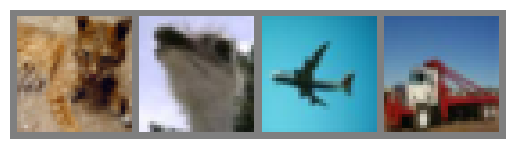

In [64]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    """Function to display an image."""
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print('      '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Training on GPU

Just like how you transfer a Tensor on to the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:

In [65]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda


If `device` is in fact set to a CUDA device, then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

```python
net = net.to(device)
```

Remember that you will have to send the inputs and targets at every step
to the GPU too:

```python
inputs, labels = inputs.to(device), labels.to(device)
```

Why don't I notice MASSIVE speedup compared to CPU? Because your network
is *realllly* small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first `nn.Conv2d`, and argument 1 of the second `nn.Conv2d` –
they need to be the same number), see what kind of speedup you get.

### 2) Define a Convolution Neural Network

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [66]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.out_channels1 = 6
        self.out_channels2 = 16
        self.conv1 = nn.Conv2d(3, self.out_channels1, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.out_channels1, self.out_channels2, 5)
        self.fc1 = nn.Linear(self.out_channels2 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

### 3) Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [67]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4) Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [68]:
import time


net = net.train()

# Loop over the dataset for multiple epochs
for epoch in range(1, 3):
    running_loss = 0.0
    t_s = time.time()

    # For each mini-batch...
    for i, data in enumerate(trainloader, 1):
        # Get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 0:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch, i, running_loss / 2000))
            running_loss = 0.0
            print('iters time:', time.time() - t_s)
            t_s = time.time()

print('Finished Training')

[1,  2000] loss: 2.196
iters time: 9.863922357559204
[1,  4000] loss: 1.831
iters time: 9.048663854598999
[1,  6000] loss: 1.661
iters time: 10.307585000991821
[1,  8000] loss: 1.568
iters time: 8.469603061676025
[1, 10000] loss: 1.502
iters time: 9.12402892112732
[1, 12000] loss: 1.472
iters time: 9.048671245574951
[2,  2000] loss: 1.378
iters time: 9.135143041610718
[2,  4000] loss: 1.371
iters time: 9.556065082550049
[2,  6000] loss: 1.326
iters time: 8.789440631866455
[2,  8000] loss: 1.304
iters time: 9.039832830429077
[2, 10000] loss: 1.283
iters time: 9.205575704574585
[2, 12000] loss: 1.258
iters time: 8.548995733261108
Finished Training


Let’s quickly save our trained model:

In [69]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

We can load back in a saved model with the following: (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so):

In [70]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### 5) Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learned anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

Ground truth:
  cat       ship       ship      plane


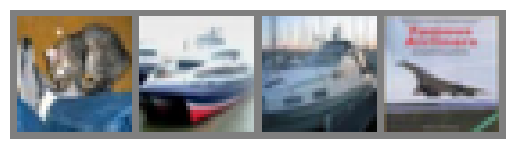

In [71]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('Ground truth:')
print('      '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [73]:
net = net.eval()

outputs = net(images.to(device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



Predicted:
  cat       ship      truck      plane


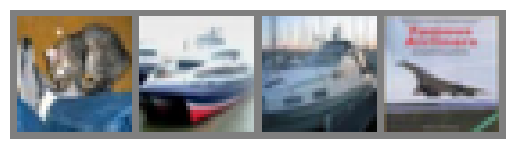

In [74]:
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('Predicted:')
print('      '.join('%5s' % classes[predicted[j]] for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [75]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d%%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55%


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learned something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:

In [76]:
class_correct = [0] * 10
class_total = [0] * 10
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s: %2d%%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane: 49%
Accuracy of   car: 48%
Accuracy of  bird: 29%
Accuracy of   cat: 42%
Accuracy of  deer: 52%
Accuracy of   dog: 48%
Accuracy of  frog: 63%
Accuracy of horse: 68%
Accuracy of  ship: 75%
Accuracy of truck: 76%


### Other information

How to write data loading code in PyTorch: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

More details on saving and loading models: https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Other Tips and Helpful Functions


### Tips for debugging

Checklist for common PyTorch mistakes:

* Did you set `shuffle=True` in your train dataloader?
* Did you properly set `net.train()` and `net.eval()` in your training and evaluation code?
* Did you call `zero_grad()` in your training loop before `.backward()` to prevent gradients from accumulating?

Other tips:
* Have you visualized your loaded images? This is the best way to catch data loader issues.
* If you are getting a CUDA out of memory error, first try decreasing the batch size. If you are still getting the same error, your network may simply be too large, or you could be accidentally allocating a large array in memory.
* If the GPU memory is full, first try clearing the outputs and restarting the kernel. If that does not work, manually clear the GPU memory using `torch.cuda.empty_cache()`.
* Getting CUDA errors that are hard to understand? Sometimes error messages will be simpler if you switch your network to cpu memory to debug the forward and backward passes.



### Pretrained models

PyTorch provides easy access to load many pretrained models. You can find a wide variety of vision models pretrained for different tasks in the `torchvision` package: https://pytorch.org/vision/stable/models.html

To load a ResNet50 model pretrained on ImageNet:

In [77]:
from torchvision.models import resnet50

resnet = resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 169MB/s]


It's common that you may want to finetune some or all of the weights in a pretrained model. You can check here for more details on how to do this: https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html


There are even more pretrained models available on the PyTorch Hub: https://pytorch.org/hub/

### More Tensor operations

The `torch.einsum` function offers a compact way to express various matrix transformations and products. Many of common matrix and vector computations can be easily expressed elegantly with a call to this function.

Some simple examples are below, but you can find many more example einsum operations in this helpful blog post: https://rockt.github.io/2018/04/30/einsum


In [78]:
x = torch.arange(6).reshape(2, 3)
print('x: ', x)

# matrix transpose
out = torch.einsum('ij->ji', [x])
print(out)

# sum all the rows in a matrix
out = torch.einsum('ij->i', [x])
print(out)

# sum all the values in a matrix
out = torch.einsum('ij->', [x])
print(out)

x:  tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])
tensor([ 3, 12])
tensor(15)


Operations on two matrices:

In [79]:
x = torch.arange(9).reshape(3, 3)
y = torch.arange(9).reshape(3, 3)
print('x: ', x)
print('y: ', y)

# element-wise multiplication
out = torch.einsum('ij,ij->ij', [x, y])
print(out)

# matrix multiplication
out = torch.einsum('ik,kj->ij', [x, y])
print(out)

x:  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
y:  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])
tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])
